## k-Nearest-Neighbor Algorithm 
- developed a kNN algorithm for simple prediction of the stock price from a single feature input 


In [3]:
import scipy as sp
import numpy as np
import matplotlib
import math

from ml_utilityfunc import *

def get_distance(x1,x2):
    return np.abs(x1-x2)

class kNNLearner:
    def __init__(self,k): 
        self.k = k
        
    def train(self,X,Y):
        # fit a line to the data
        # find an m and a b --> parameters of linear model
        # self.m, self.b, intercept,rvalue,pvalue,stderr = sp.stats.linregress(X,Y) # use algo you want from SciPy and Numpy
        self.xt = X
        self.yt = Y
        
    def query(self,X):
        y_pred = []
        for Xt in X:
            kNN_indx = np.argsort(get_distance(Xt,self.xt))[:self.k]
            y_pred.append(np.average(self.yt[kNN_indx]))
        return y_pred

In [12]:
def test_run():
    # initialize training data
    start_datet = '2009-01-01'
    end_datet = '12-31-2010'
    datest = pd.date_range(start_datet,end_datet)
    symbols = ['SPY','XOM']
    df_train = get_data(symbols, datest, dropna=True)
    
    pred_win = 50
    learner = kNNLearner(k=15)
    learner.train(df_train['XOM'][:-pred_win],df_train['SPY'][pred_win:])
    
    start_date = '2011-01-01'
    end_date = '12-31-2012'
    
    dates = pd.date_range(start_datet,end_datet)
    df_test = get_data(symbols, dates, dropna=True)
    
    ypredict = learner.query(df_test['XOM'][:-pred_win])
    
    plt.plot(ypredict,df_test['SPY'][pred_win:],'k.')
    print np.corrcoef(ypredict,df_test['SPY'][pred_win:])

[[ 1.          0.58608235]
 [ 0.58608235  1.        ]]


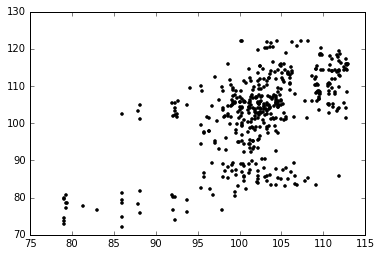

In [13]:
test_run()